Importing libraries

In [20]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

Load Dataset

In [5]:
df = pd.read_csv("/content/HDFC.csv")




In [6]:
print(df.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2014-01-01  334.000000  334.899994  331.500000  332.575012  306.132019   
1  2014-01-02  332.500000  337.375000  326.774994  328.500000  302.381012   
2  2014-01-03  326.000000  333.000000  325.000000  331.549988  305.188416   
3  2014-01-06  331.500000  331.500000  328.500000  330.850006  304.544128   
4  2014-01-07  333.549988  335.475006  326.649994  332.200012  305.786804   

      Volume  
0  2246218.0  
1  3614496.0  
2  3256592.0  
3  2981710.0  
4  3948460.0  


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1517 non-null   object 
 1   Open       1514 non-null   float64
 2   High       1514 non-null   float64
 3   Low        1514 non-null   float64
 4   Close      1514 non-null   float64
 5   Adj Close  1514 non-null   float64
 6   Volume     1514 non-null   float64
dtypes: float64(6), object(1)
memory usage: 83.1+ KB
None


In [8]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1514.000000  1514.000000  1514.000000  1514.000000  1514.000000   
mean    760.308814   766.187119   753.940044   760.229290   740.556517   
std     285.584305   287.242730   283.290437   285.164038   294.089729   
min     310.825012   317.000000   308.399994   313.250000   288.343536   
25%     520.750000   527.456253   516.218750   521.531265   492.145538   
50%     651.500000   654.725006   647.137482   651.000000   628.934052   
75%    1015.037491  1026.074982  1010.662506  1017.627472  1006.872116   
max    1305.000000  1305.500000  1288.800049  1302.400024  1302.400024   

             Volume  
count  1.514000e+03  
mean   4.243036e+06  
std    5.988969e+06  
min    0.000000e+00  
25%    2.275744e+06  
50%    3.263497e+06  
75%    5.022568e+06  
max    2.011300e+08  


Handle Missing values

In [9]:
print(df.isnull().sum())

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64


fill numeric with median

In [10]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

Fill categorical with mode

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-4270251612.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Encode Categorical Variables

In [12]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Define Features & Target

In [14]:
X = df.drop("Close", axis=1)
y = df["Close"]

Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42

)

Create ML Pipeline

In [17]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

Hyperparameter Tuning

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Redefining the pipeline here to ensure the latest version is used.
# Ideally, the cell defining the pipeline (bP9iTrjSFFN7) should be re-executed.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error', # Changed scoring to a regression metric
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


Model Evaluation

Mean Squared Error (MSE): 14.08
Root Mean Squared Error (RMSE): 3.75
Mean Absolute Error (MAE): 1.72
R-squared (R2 Score): 1.00


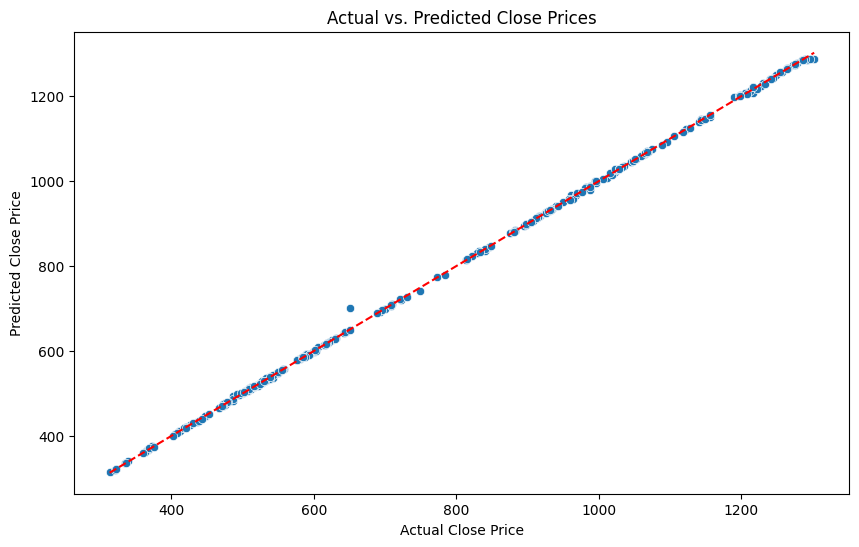

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate with regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# For visualizing predicted vs actual, a scatter plot is more appropriate for regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line
plt.show()

Save Model

In [24]:
joblib.dump(best_model, "hdfc_model.pkl")


['hdfc_model.pkl']

Alternative Models

Logistic Regression

In [26]:
from sklearn.linear_model import LinearRegression

log_model = LinearRegression()
log_model.fit(X_train, y_train)

LinearRegression()

SVM

In [28]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

SVR(C=1)

Load Saved Mode

In [30]:
import joblib
import pandas as pd
import numpy as np

# Load trained model
model = joblib.load("hdfc_model.pkl")


Predict for Single New Data

In [34]:

new_data = np.array([[0, 334.00, 334.90, 331.50, 306.13, 2246218.0]]) # This is just an example. Replace with actual new data.

prediction = model.predict(new_data)

print("Prediction:", prediction[0])

Prediction: 332.3920097200004


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predict with Column Names

In [36]:

new_data = pd.DataFrame({
    'Date': [0],
    'Open': [334.00],
    'High': [334.90],
    'Low': [331.50],
    'Adj Close': [306.13],
    'Volume': [2246218.0]
})

prediction = model.predict(new_data)

print("Prediction:", prediction[0])

Prediction: 332.3920097200004


Predict Multiple Rows

In [38]:

new_data = pd.DataFrame({
    'Date': [0, 1],
    'Open': [334.00, 332.50],
    'High': [334.90, 337.37],
    'Low': [331.50, 326.77],
    'Adj Close': [306.13, 302.38],
    'Volume': [2246218.0, 3614496.0]
})

predictions = model.predict(new_data)

print("Predictions:", predictions)

Predictions: [332.39200972 329.7212509 ]


Predict on Entire Dataset

In [42]:

predictions = model.predict(X)

df["Predicted"] = predictions

print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-01-01  334.000000  334.899994  331.500000  332.575012  306.132019   
1  2014-01-02  332.500000  337.375000  326.774994  328.500000  302.381012   
2  2014-01-03  326.000000  333.000000  325.000000  331.549988  305.188416   
3  2014-01-06  331.500000  331.500000  328.500000  330.850006  304.544128   
4  2014-01-07  333.549988  335.475006  326.649994  332.200012  305.786804   

      Volume   Predicted  
0  2246218.0  332.392010  
1  3614496.0  329.721251  
2  3256592.0  331.206744  
3  2981710.0  330.675003  
4  3948460.0  332.036009  


Convert Prediction to Meaningful Output

In [43]:
if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Rejected")


Loan Rejected
